## 0. Import Packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

## 1. Import Data

In [4]:
train = pd.read_csv('../train.csv')
test = pd.read_csv('../test.csv')
print(train.shape,test.shape)

((7352, 563), (2947, 563))


In [5]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [6]:
sv = SVC()
sv

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
from sklearn.preprocessing import LabelEncoder

X_train = train.iloc[:,:-2]
Y_train = train['Activity']
le = LabelEncoder()
le.fit(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS','WALKING_UPSTAIRS'] )
Y_train_encoded = le.transform(Y_train)

In [8]:
X_test = test.iloc[:,:-2]
Y_test = test['Activity']
Y_test_encoded = le.transform(Y_test)

## 2. Training model using all features

In [9]:
sv.fit(X_train,Y_train_encoded)
print ("SVM Train Accuracy : {}".format(accuracy_score(Y_train_encoded,sv.predict(X_train))))
print ("SVM Test Accuracy : {}".format(accuracy_score(Y_test_encoded,sv.predict(X_test))))

SVM Train Accuracy : 0.955658324266
SVM Test Accuracy : 0.940278249067


## 3. Choosing the kernel

In [23]:
test_scores = []
for i in ['rbf','linear','poly','sigmoid']:
    sv = SVC(kernel=i)
    sv.fit(X_train,Y_train_encoded)
    acc = accuracy_score(Y_test_encoded,sv.predict(X_test))
    test_scores.append(acc)
    print("{} : {}".format(i,acc))

rbf : 0.940278249067
linear : 0.964031218188
poly : 0.907363420428
sigmoid : 0.917203936206


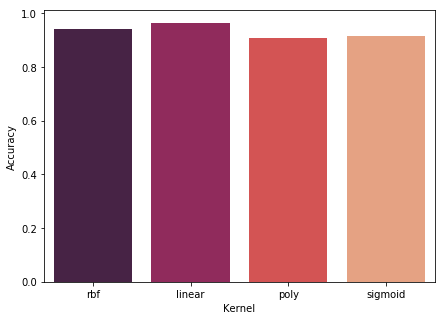

In [24]:
import seaborn as sns
plt.figure(figsize=(7,5))
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
sns.barplot(['rbf','linear','poly','sigmoid'],test_scores,palette="rocket")

## 4. Training with 'linear' kernel

In [25]:
sv = SVC(kernel='linear')
sv.fit(X_train,Y_train_encoded)
print ("SVM Train Accuracy : {}".format(accuracy_score(Y_train_encoded,sv.predict(X_train))))
print ("SVM Test Accuracy : {}".format(accuracy_score(Y_test_encoded,sv.predict(X_test))))

SVM Train Accuracy : 0.99387921654
SVM Test Accuracy : 0.964031218188


## 5. Choosing the value of regularization parameter, C

In [27]:
test_scores = []
for i in [0.001,0.01,0.1,1,10,100,1000]:
    sv = SVC(kernel='linear',C=i)
    sv.fit(X_train,Y_train_encoded)
    acc = accuracy_score(Y_test_encoded,sv.predict(X_test))
    test_scores.append(acc)
    print("{} : {}".format(i,acc))

0.001 : 0.91007804547
0.01 : 0.950458092976
0.1 : 0.960637936885
1 : 0.964031218188
10 : 0.963013233797
100 : 0.961995249406
1000 : 0.961316593146


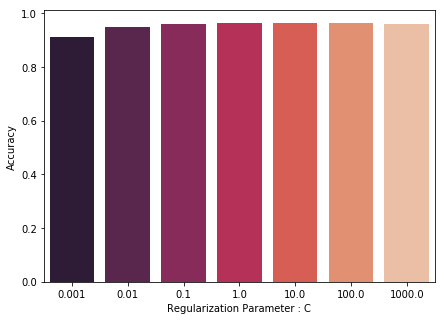

In [28]:
import seaborn as sns
plt.figure(figsize=(7,5))
plt.xlabel('Regularization Parameter : C')
plt.ylabel('Accuracy')
sns.barplot([0.001,0.01,0.1,1,10,100,1000],test_scores,palette="rocket")

## 6. PCA

In [29]:
from sklearn.decomposition import PCA
X_train = train.iloc[:,:-2]
X_test = test.iloc[:,:-2]
pca = PCA(n_components=10)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train.shape,X_train_pca.shape)
print(X_test.shape,X_test_pca.shape)

((7352, 561), (7352, 10))
((2947, 561), (2947, 10))


In [30]:
sv = SVC(kernel='linear',C=1.0)
sv.fit(X_train_pca,Y_train_encoded)
print ("SVM Train Accuracy : {}".format(accuracy_score(Y_train_encoded,sv.predict(X_train_pca))))
print ("SVM Test Accuracy : {}".format(accuracy_score(Y_test_encoded,sv.predict(X_test_pca))))

SVM Train Accuracy : 0.902339499456
SVM Test Accuracy : 0.878520529352


## 7. Selecting the number of components

In [32]:
r = range(10,251,10)
pca_scores = []
for i in r:
    pca = PCA(n_components=i,random_state=0).fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    sv = SVC(kernel='linear',C=1.0).fit(X_train_pca,Y_train_encoded)
    acc = accuracy_score(Y_test_encoded,sv.predict(X_test_pca))
    pca_scores.append(acc)
    print("{} : {}".format(i,acc))

10 : 0.878859857482
20 : 0.875127248049
30 : 0.893450967085
40 : 0.918221920597
50 : 0.919239904988
60 : 0.939938920937
70 : 0.941296233458
80 : 0.936206311503
90 : 0.94333220224
100 : 0.940278249067
110 : 0.948761452324
120 : 0.945707499152
130 : 0.95453003054
140 : 0.954190702409
150 : 0.956226671191
160 : 0.958601968103
170 : 0.960637936885
180 : 0.963013233797
190 : 0.963352561927
200 : 0.962334577536
210 : 0.963352561927
220 : 0.963013233797
230 : 0.962673905667
240 : 0.963352561927
250 : 0.963013233797


([<matplotlib.axis.XTick at 0x7f355622a710>,
 <a list of 25 Text xticklabel objects>)

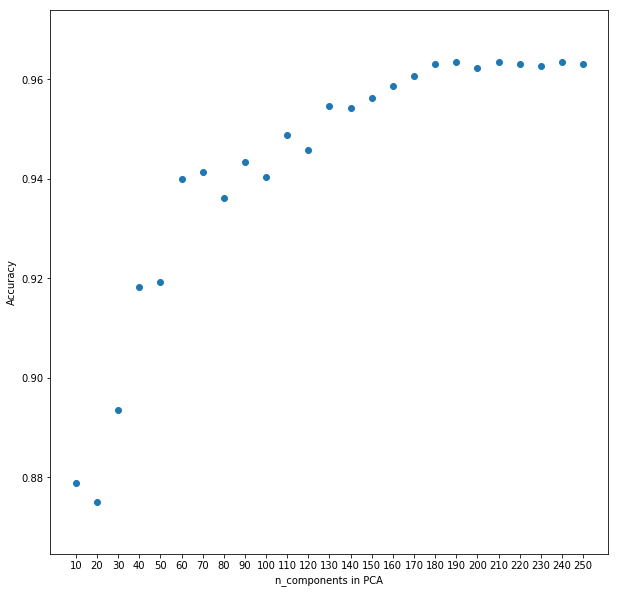

In [33]:
plt.figure(figsize=(10,10))
plt.xlabel('n_components in PCA')
plt.ylabel('Accuracy')
plt.scatter(range(10,260,10),pca_scores)
plt.xticks(range(10,260,10))

## 8. Training model with 190 components

In [35]:
pca = PCA(n_components=190,random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
sv = SVC(kernel='linear',C=1.0).fit(X_train_pca,Y_train_encoded)
print ("SVM Train Accuracy : {}".format(accuracy_score(Y_train_encoded,sv.predict(X_train_pca))))
print ("SVM Test Accuracy : {}".format(accuracy_score(Y_test_encoded,sv.predict(X_test_pca))))

SVM Train Accuracy : 0.992927094668
SVM Test Accuracy : 0.963352561927
